In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn import svm
import matplotlib.pyplot as plt

/home/mvp18/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [66]:
dataset = pd.read_csv('student-mat.csv', sep=';')

In [67]:
imp_features = dataset.drop(['school', 'sex', 'reason'], axis=1)
imp_features.shape

(395, 30)

In [68]:
imp_features.head()

,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,traveltime,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,U,GT3,A,4,4,at_home,teacher,mother,2,...,4,3,4,1,1,3,6,5,6,6
1,17,U,GT3,T,1,1,at_home,other,father,1,...,5,3,3,1,1,3,4,5,5,6
2,15,U,LE3,T,1,1,at_home,other,mother,1,...,4,3,2,2,3,3,10,7,8,10
3,15,U,GT3,T,4,2,health,services,mother,1,...,3,2,2,1,1,5,2,15,14,15
4,16,U,GT3,T,3,3,other,other,father,1,...,4,3,2,1,2,5,4,6,10,10


In [69]:
address_mapping = {"U":0, "R":1}
famsize_mapping = {"LE3":0,"GT3":1}
Pstatus_mapping = {"T":0,"A":1}
Mjob_mapping = {"teacher":0,"health":1,"services":2,"at_home":3,"other":4}
Fjob_mapping = {"teacher":0,"health":1,"services":2,"at_home":3,"other":4}
schoolsup_mapping = {"yes":0,"no":1}
famsup_mapping = {"yes":0,"no":1}
paid_mapping = {"yes":0,"no":1}
activities_mapping = {"yes":0,"no":1}
nursery_mapping = {"yes":0,"no":1}
higher_mapping = {"yes":0,"no":1}
internet_mapping = {"yes":0,"no":1}
romantic_mapping = {"yes":0,"no":1}
guardian_mapping = {"mother":0,"father":1,"other":2}

In [70]:
numeric_features = imp_features
numeric_features['address'] = imp_features['address'].map(address_mapping)
numeric_features['famsize'] = imp_features['famsize'].map(famsize_mapping)
numeric_features['Pstatus'] = imp_features['Pstatus'].map(Pstatus_mapping)
numeric_features['Mjob'] = imp_features['Mjob'].map(Mjob_mapping)
numeric_features['Fjob'] = imp_features['Fjob'].map(Fjob_mapping)
numeric_features['schoolsup'] = imp_features['schoolsup'].map(schoolsup_mapping)
numeric_features['famsup'] = imp_features['famsup'].map(famsup_mapping)
numeric_features['paid'] = imp_features['paid'].map(paid_mapping)
numeric_features['activities'] = imp_features['activities'].map(activities_mapping)
numeric_features['nursery'] = imp_features['nursery'].map(nursery_mapping)
numeric_features['higher'] = imp_features['higher'].map(higher_mapping)
numeric_features['internet'] = imp_features['internet'].map(internet_mapping)
numeric_features['romantic'] = imp_features['romantic'].map(romantic_mapping)
numeric_features['guardian'] = imp_features['guardian'].map(guardian_mapping)

In [71]:
data_np_array = numeric_features.values

In [72]:
numeric_features.head()

,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,traveltime,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,0,1,1,4,4,3,0,0,2,...,4,3,4,1,1,3,6,5,6,6
1,17,0,1,0,1,1,3,4,1,1,...,5,3,3,1,1,3,4,5,5,6
2,15,0,0,0,1,1,3,4,0,1,...,4,3,2,2,3,3,10,7,8,10
3,15,0,1,0,4,2,1,2,0,1,...,3,2,2,1,1,5,2,15,14,15
4,16,0,1,0,3,3,4,4,1,1,...,4,3,2,1,2,5,4,6,10,10


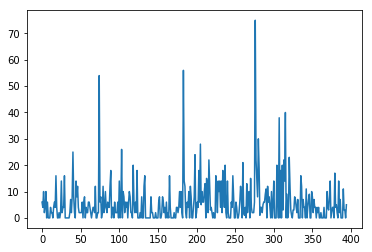

In [73]:
plt.plot(data_np_array[:,-4])
plt.show()

In [86]:
data_np_array[:,-1:]

(395,)

In [48]:
X = data_np_array[:,-4:-1]
Y = data_np_array[:,-1:]
# Y = np.mean(Y,axis=1)
print(X.shape)
print(Y.shape)

(395, 2)
(395, 1)


In [49]:
X[1]

array([5, 5])

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [51]:
linear_svc = LinearRegression()
linear_svc.fit(X_train, Y_train)
R2_score = linear_svc.score(X_test, Y_test)*100
R2_score

79.45936216805896

In [14]:
rng = np.random.RandomState(1)
ada_dt = MultiOutputRegressor(AdaBoostRegressor(DecisionTreeRegressor(max_depth=5), n_estimators=300, random_state=rng))
ada_dt.fit(X_train, Y_train)
R2_score = ada_dt.score(X_test, Y_test)*100
R2_score

ValueError: y must have at least two dimensions for multi-output regression but has only one.

In [ ]:
svr_rbf = MultiOutputRegressor(svm.SVR(kernel='rbf'))
svr_lin = MultiOutputRegressor(svm.SVR(kernel='linear'))
svr_rbf.fit(X_train, Y_train)
svr_lin.fit(X_train, Y_train)
R2_1 = svr_rbf.score(X_test, Y_test)*100
R2_2 = svr_lin.score(X_test, Y_test)*100
print(R2_1, R2_2)

In [ ]:
knn = KNeighborsRegressor()
knn_multi = MultiOutputRegressor(knn)
knn_multi.fit(X_train, Y_train)
R2_score = knn_multi.score(X_test, Y_test)*100
R2_score

In [53]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth=8)
regr_1.fit(X_train, Y_train)
regr_2.fit(X_train, Y_train)
regr_3.fit(X_train, Y_train)
R2_1 = regr_1.score(X_test, Y_test)*100
R2_2 = regr_2.score(X_test, Y_test)*100
R2_3 = regr_3.score(X_test, Y_test)*100
print(R2_1, R2_2, R2_3)

67.47822861890418 76.66244755909477 76.78144435397219


In [52]:
random_forest = RandomForestRegressor(n_estimators=300)
random_forest.fit(X_train, Y_train)
R2_score = random_forest.score(X_test, Y_test)*100
R2_score

/home/mvp18/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


77.13195889274213

In [31]:
from sklearn.neural_network import MLPRegressor
clf = MLPRegressor(max_iter=1000)
clf.fit(X_train, Y_train)
R2_score = clf.score(X_test, Y_test)*100
R2_score

-28.597180334532602